In [15]:
import sys, os, time

sys.path.append("../..")
import pyzx as zx
from benchmarking import Benchmark
import numpy as np
import argparse
import time
from distutils.util import strtobool
from typing import Optional

import gymnasium as gym
import gym_zx

import numpy as np
import torch
from torch_geometric.data import Batch, Data
from rl_agent import AgentGNN

global device

device = torch.device("cpu")


In [7]:
import json

# Path to your JSON file
file_path = '/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Circopt-RL-ZXCalc/rl-zx/test-specific-circuits/results/specific_circuits/test.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Now data contains the dictionary from the JSON file
print(data)
print(len(data["gates"]))

{'gates': [88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 8

In [16]:
b = Benchmark()

In [17]:
b.load_circuits(
    dirname=os.path.join("..", "..", "..", "pyzx", "circuits", "benchmarking_circuits", "Fast", "circuits_paper"),
    group_name="fast",
)
b.load_circuits(
    dirname=os.path.join("..", "..", "..", "pyzx", "circuits", "benchmarking_circuits", "Fast", "nrscm", "circuits_paper"),
    group_name="fast",
    simp_strategy="NRSCM",
)
b.load_circuits(
    dirname=os.path.join("specific_circuits_data", "circuits"),
    group_name="fast",
    simp_strategy="RL-ZX",
)
"""b.load_circuits(
    dirname=os.path.join("specific_circuits_data", "gflow-cflow-opt"),
    group_name="fast",
    simp_strategy="gflow+cflow",
)
b.load_circuits(
    dirname=os.path.join("specific_circuits_data", "flow-opt"),
    group_name="fast",
    simp_strategy="cflow",
)"""
"""b.load_circuits(
    dirname=os.path.join("..", "..", "pyzx", "circuits", "benchmarking_circuits", "Fast", "tpar"),
    group_name="fast",
    simp_strategy="TPar",
)"""
b.show_attributes()


Circuit attributes:  ['Qubits', 'Gates', 'Single Qubit', '2Q Count', 'T Count', 't_opt', 'depth']
No loaded functions
Loaded routines:  ['RL-ZX', 'NRSCM']
Loaded circuit groups:  ['fast']


,Original,NRSCM,RL-ZX
fast,Y,Y,Y


In [18]:
f = b.df(groups=["fast"], routines=["all"], funcs=["all"], atts=["Qubits","Gates","Single Qubit", "2Q Count"])

In [ ]:
directory = '/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Circopt-RL-ZXCalc/rl-zx/test-specific-circuits/specific_circuits_data/random_stats'

In [11]:
import os
import json

# Directory containing the JSON files
directory = '/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Circopt-RL-ZXCalc/rl-zx/test-specific-circuits/specific_circuits_data/random_stats'

# Dictionary to store the best stats
best_stats = {}

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('_rand_policy_stats.json'):
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Extract the name part from the filename (before '_rand_policy_stats.json')
            name = filename.replace('_rand_policy_stats.json', '')
            #name = 'rc_adder_6'
            # Extract values
            gates = data['gates']
            twoqubit = data['twoqubit']
            single_qubit = [a-b for (a,b) in zip(gates, twoqubit)]
            idx = twoqubit.index(min(twoqubit))
            # Check if we already have stats for this circuit
            if name not in best_stats:
                best_stats[name] = {'gates': gates[idx], 'twoqubit': min(twoqubit), "single qubit": single_qubit[idx]}
            else:
                best_stats[name]['gates'] = min(best_stats[name]['gates'], min(gates))
                best_stats[name]['twoqubit'] = min(best_stats[name]['twoqubit'], min(twoqubit))
                best_stats[name]['single qubit'] = min(best_stats[name]['single qubit'], min(single_qubit))


# Write the results to a new JSON file
output_file = 'random_stats.json'
with open(output_file, 'w') as file:
    json.dump(best_stats, file, indent=4)

print(f'Best stats saved to {output_file}')


Best stats saved to random_stats.json


In [6]:
import json
import pandas as pd

# Read the JSON file
with open('random_stats.json', 'r') as file:
    best_stats = json.load(file)

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(best_stats, orient='index')

# Rename columns for clarity
df.rename(columns={'gates': 'Gates', 'twoqubit': '2Q Count'}, inplace=True)


# Move the new column to the front
df2 = df[['Gates', '2Q Count']]

# Display the DataFrame
print(df)



                      Gates  2Q Count
Adder8                  245       116
barenco_tof_3            40        17
barenco_tof_4            73        34
barenco_tof_5           113        50
barenco_tof_10          302       138
csla_mux_3_original     146        65
csum_mux_9_corrected    281       138
gf2^4_mult              172        93
gf2^5_mult              275       147
gf2^6_mult              386       208
mod_mult_55              87        39
mod5_4                   24        13
QFT8_before              97        42
QFT16_before            326       155
rc_adder_6              154        67
tof_3                    35        14
tof_4                    57        23
tof_5                    77        31
tof_10                  183        78
vbe_adder_3              81        34
grover_5                501       217
hwb6                    204        91
qft_4                   145        35
QFTAdd8                 284       149
mod_red_21              188        80
qcla_adder_1

In [12]:
df = b.df2(groups=["fast"], routines=["all"], funcs=["all"], atts=["Qubits","Gates", "Single Qubit", "2Q Count"], json_file="random_stats.json")

In [10]:
def basic_optimise(c):
    c1 = zx.basic_optimization(c.copy(), do_swaps=False).to_basic_gates()
    c2 = zx.basic_optimization(c.copy(), do_swaps=True).to_basic_gates()
    if c2.twoqubitcount() < c1.twoqubitcount() and c2.twoqubitcount()<c.twoqubitcount():
        return c1  # As this optimisation algorithm is targetted at reducting H-gates, we use the circuit with the smaller 2-qubit gate count here, either using SWAP rules or not.
    if c1.twoqubitcount() <= c2.twoqubitcount() and c1.twoqubitcount()<c.twoqubitcount():
        return c2
    return c
def basic_optimise_calum(c):
    c1 = zx.basic_optimization(c.copy(), do_swaps=False).to_basic_gates()
    c2 = zx.basic_optimization(c.copy(), do_swaps=True).to_basic_gates()
    if c2.twoqubitcount() < c1.twoqubitcount(): return c2 # As this optimisation algorithm is targetted at reducting H-gates, we use the circuit with the smaller 2-qubit gate count here, either using SWAP rules or not.
    return c1


def gflow_korbinian(c):
    c.to_basic_gates()
    g = c.to_graph()
    zx.teleport_reduce(g)
    zx.to_graph_like(g)
    zx.simplify.greedy_simp(g)
    c = zx.extract_circuit(g, up_to_perm=True)
    return basic_optimise_calum(c)

def flow_opt(c):
    c.to_basic_gates()
    g = c.to_graph()
    zx.teleport_reduce(g)
    zx.to_graph_like(g)
    zx.flow_2Q_simp(g)
    c2 = zx.extract_simple(g, up_to_perm=True).to_basic_gates()
    return basic_optimise_calum(c2)

def gflow_and_cflow(c):
    c1 = gflow_korbinian(c)
    c2 = flow_opt(c1)
    return c2

In [19]:
import pyzx as zx
path = "/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Copt-cquere/rl-zx/cquere/circuits/before/marcin/v2.qasm"
c = zx.Circuit.load(path).to_basic_gates()
max_lc=max_p=4
c1 = flow_opt(c)
print(c.stats_dict())
data0 = c.stats_dict()
print(c.depth())
data = c1.stats_dict()
print(data)

{'name': 'v2.qasm', 'qubits': 6, 'gates': 1498, 'tcount': 301, 'clifford': 1197, 'twoqubit': 208, 'cnot': 0, 'had': 0, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
1087
{'name': '', 'qubits': 6, 'gates': 354, 'tcount': 148, 'clifford': 206, 'twoqubit': 172, 'cnot': 158, 'had': 32, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


In [21]:
import pyzx as zx
path = "/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Copt-cquere/rl-zx/cquere/circuits/after/marcin/v2.qasm"
c = zx.Circuit.load(path).to_basic_gates()
max_lc=max_p=4

print(c.stats_dict())
data0 = c.stats_dict()


{'name': 'v2.qasm', 'qubits': 6, 'gates': 372, 'tcount': 129, 'clifford': 243, 'twoqubit': 185, 'cnot': 171, 'had': 32, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


In [20]:
print(data["gates"]-data["twoqubit"])
print(data0["gates"]-data0["twoqubit"])

182
1290


In [5]:
def make_env(gym_id, seed, idx, capture_video, run_name, qubits, depth, toffoli,circuit, basic_opt,tele_reduce):
    
    def thunk():
        env = gym.make(gym_id, qubits=qubits, depth=depth, env_id= idx,circuit=circuit, toffoli=toffoli, basic_opt=basic_opt, tele_red=tele_reduce, QAOA=False)
        env = gym.wrappers.RecordEpisodeStatistics(env)
        if capture_video and idx == 0:
            env = gym.wrappers.RecordVideo(env, f"videos/{run_name}")
        return env

    return thunk


def rl_zx(c):
    best_result = np.inf
    stats = c.stats_dict()
    qubits = stats["qubits"]
    depth = stats["depth"]
    toffoli=False
    #circuit= zx.Circuit.from_qasm_file(dirname + circuit_name).to_basic_gates()
    basic_opt=False
    tele_reduce=False
    envs = gym.vector.SyncVectorEnv(
        [make_env("zx-v0", 1 + i, i, False, 'test', qubits, depth, toffoli, c, basic_opt, tele_reduce) for i in range(1)])


    agent = AgentGNN(envs, device).to(device)  # Pass the envs argument here

    agent.load_state_dict(
        torch.load("/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Copt-cquere/rl-zx/test-specific-circuits/state_dict_195300005q_70_gflow_step_cflow_end_c2_init.pt", map_location=torch.device("cpu"))
    )  # Add the map_location argument here
    agent.eval()

    done = False

    for episode in range(10):
        done = False
        obs0, reset_info = envs.reset()
        new_value_data = []
        new_policy_data = []
        for item in reset_info["graph_obs"]:
            policy_items, value_items = item[0], item[1]
            value_graph = Data(x=value_items[0], edge_index=value_items[1])
            policy_graph = Data(
                x=policy_items[0], edge_index=policy_items[1], edge_attr=policy_items[2], y=policy_items[3]
            )
            new_value_data.append(value_graph)
            new_policy_data.append(policy_graph)

        # next_obs = torch.Tensor(obs0).to(device)  # Torch.size([8,1,40,40])
        next_obs_graph = (
            Batch.from_data_list(new_policy_data).to(device),
            Batch.from_data_list(new_value_data).to(device),
        )
        state = next_obs_graph
        start = time.time()
        while not done:

            # action_masks = torch.Tensor(np.array(envs.envs[0].action_mask()).reshape(1, -1))
            # Get the action from the model
            action, action_id = agent.get_action(state, None)
            action = action.flatten()
            # Take the action in the environment
            next_obs, reward, done, deprecated, info = envs.step(action_id.cpu().numpy())
            new_value_data = []
            new_policy_data = []

            for item in info["graph_obs"]:
                policy_items, value_items = item[0], item[1]
                value_graph = Data(x=value_items[0], edge_index=value_items[1])
                policy_graph = Data(
                    x=policy_items[0], edge_index=policy_items[1], edge_attr=policy_items[2], y=policy_items[3]
                )
                new_value_data.append(value_graph)
                new_policy_data.append(policy_graph)

            # next_obs = torch.Tensor(next_obs).to(device)  # Torch.size([8,1,40,40])
            next_obs_graph = (
                Batch.from_data_list(new_policy_data).to(device),
                Batch.from_data_list(new_value_data).to(device),
            )
            next_done = torch.zeros(1).to(device)
            state = next_obs_graph

        twoq_gates = info["rl_stats"]["twoqubits"][0]
        if twoq_gates < best_result:
            circuit = info["final_circuit"][0]
            best_result = twoq_gates
    return circuit

In [20]:
#b.add_simplification_func(func=rl_zx, name="RL-ZX", groups_to_run=None, verify=False)
b.add_simplification_func(func=flow_opt, name="flow-opt", groups_to_run=["fast"], verify=False, rerun=False)
b.add_simplification_func(func=gflow_and_cflow, name="gflow-cflow-opt", groups_to_run=["fast"], verify=False, rerun=False)


b.run(funcs_to_run=["flow-opt", "gflow-cflow-opt"], groups_to_run=["fast"], verify=True, rerun=True)

b.show_attributes()

Processing flow-opt on qft_4                                          : 100%|██████████| 33/33 [9:03:01<00:00, 987.33s/it]    
Processing gflow-cflow-opt on qft_4                                   : 100%|██████████| 33/33 [11:50<00:00, 21.52s/it]
Processing flow-opt on adder_8                                        :   0%|          | 0/33 [00:00<?, ?it/s]

Circuit resulting from flow-opt on adder_8 not verified


Processing gflow-cflow-opt on adder_8                                 :   0%|          | 0/33 [01:56<?, ?it/s]

Circuit resulting from gflow-cflow-opt on adder_8 not verified


Processing flow-opt on csla_mux_3_original                            :  24%|██▍       | 8/33 [03:54<03:37,  8.69s/it]   

Circuit resulting from flow-opt on csla_mux_3_original not verified


Processing gflow-cflow-opt on qcla_com_7                              :  42%|████▏     | 14/33 [11:52<44:11, 139.56s/it]

Circuit resulting from gflow-cflow-opt on qcla_com_7 not verified


Processing gflow-cflow-opt on qcla_adder_10                           :  45%|████▌     | 15/33 [12:10<30:48, 102.71s/it]

Circuit resulting from gflow-cflow-opt on qcla_adder_10 not verified


Processing gflow-cflow-opt on vbe_adder_3                             :  48%|████▊     | 16/33 [12:39<23:53, 84.35s/it] 

Circuit resulting from gflow-cflow-opt on vbe_adder_3 not verified


Processing flow-opt on gf2^8_mult                                     :  64%|██████▎   | 21/33 [19:39<24:56, 124.71s/it]

Circuit resulting from flow-opt on gf2^8_mult not verified


Processing gflow-cflow-opt on gf2^8_mult                              :  64%|██████▎   | 21/33 [28:11<24:56, 124.71s/it]

Circuit resulting from gflow-cflow-opt on gf2^8_mult not verified


Processing flow-opt on QFT32_before                                   :  73%|███████▎  | 24/33 [2:30:51<5:45:33, 2303.71s/it]

In [5]:
df = b.df2(groups=["fast"], routines=["all"], funcs=["NRSCM" ,"RL-ZX", "Random-RL-ZX" , "cflow", "gflow+cflow"], atts=["Qubits","Gates","Single Qubit", "2Q Count"], json_file="random_stats.json")

The function NRSCM has not been added. Call <benchmark>.show_attributes() to see loaded functions.
The function RL-ZX has not been added. Call <benchmark>.show_attributes() to see loaded functions.
The function Random-RL-ZX has not been added. Call <benchmark>.show_attributes() to see loaded functions.
The function cflow has not been added. Call <benchmark>.show_attributes() to see loaded functions.
The function gflow+cflow has not been added. Call <benchmark>.show_attributes() to see loaded functions.


In [13]:
print(df.to_latex(float_format="%.0f"))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & \multicolumn{3}{r}{Original} & \multicolumn{2}{r}{NRSCM} & \multicolumn{2}{r}{RL-ZX} & \multicolumn{2}{r}{cflow} & \multicolumn{2}{r}{gflow+cflow} & \multicolumn{2}{r}{Random-RL-ZX} \\
 & Qubits & Gates & 2Q Count & Gates & 2Q Count & Gates & 2Q Count & Gates & 2Q Count & Gates & 2Q Count & Gates & 2Q Count \\
\midrule
Adder8 & 23 & 637 & 243 & 190 & 94 & 214 & 92 & 237 & 112 & 297 & 141 & 245 & 116 \\
QFT16_before & 16 & 586 & 228 & NaN & NaN & 327 & 144 & 388 & 228 & 328 & 144 & 326 & 155 \\
QFT32_before & 32 & 1562 & 612 & NaN & NaN & 824 & 368 & 1012 & 612 & 824 & 368 & NaN & NaN \\
QFT8_before & 8 & 148 & 56 & NaN & NaN & 98 & 42 & 106 & 56 & 100 & 42 & 97 & 42 \\
QFTAdd8 & 16 & 476 & 184 & 322 & 184 & 273 & 138 & 301 & 175 & 286 & 157 & 284 & 149 \\
adder_8 & 24 & 900 & 409 & 606 & 291 & 505 & 244 & 586 & 274 & 583 & 278 & NaN & NaN \\
barenco_tof_10 & 19 & 450 & 192 & 264 & 130 & 289 & 130 & 320 & 146 & 316 & 147 & 302 & 138 \\
barenco

In [8]:
b.show_attributes()

Circuit attributes:  ['Qubits', 'Gates', '2Q Count', 'T Count', 't_opt']
Loaded functions:  ['RL-ZX', 'flow-opt']
Loaded routines:  ['TPar', 'NRSCM']
Loaded circuit groups:  ['fast']


,Original,NRSCM,RL-ZX,TPar,flow-opt
fast,Y,Y,Y,Y,Y


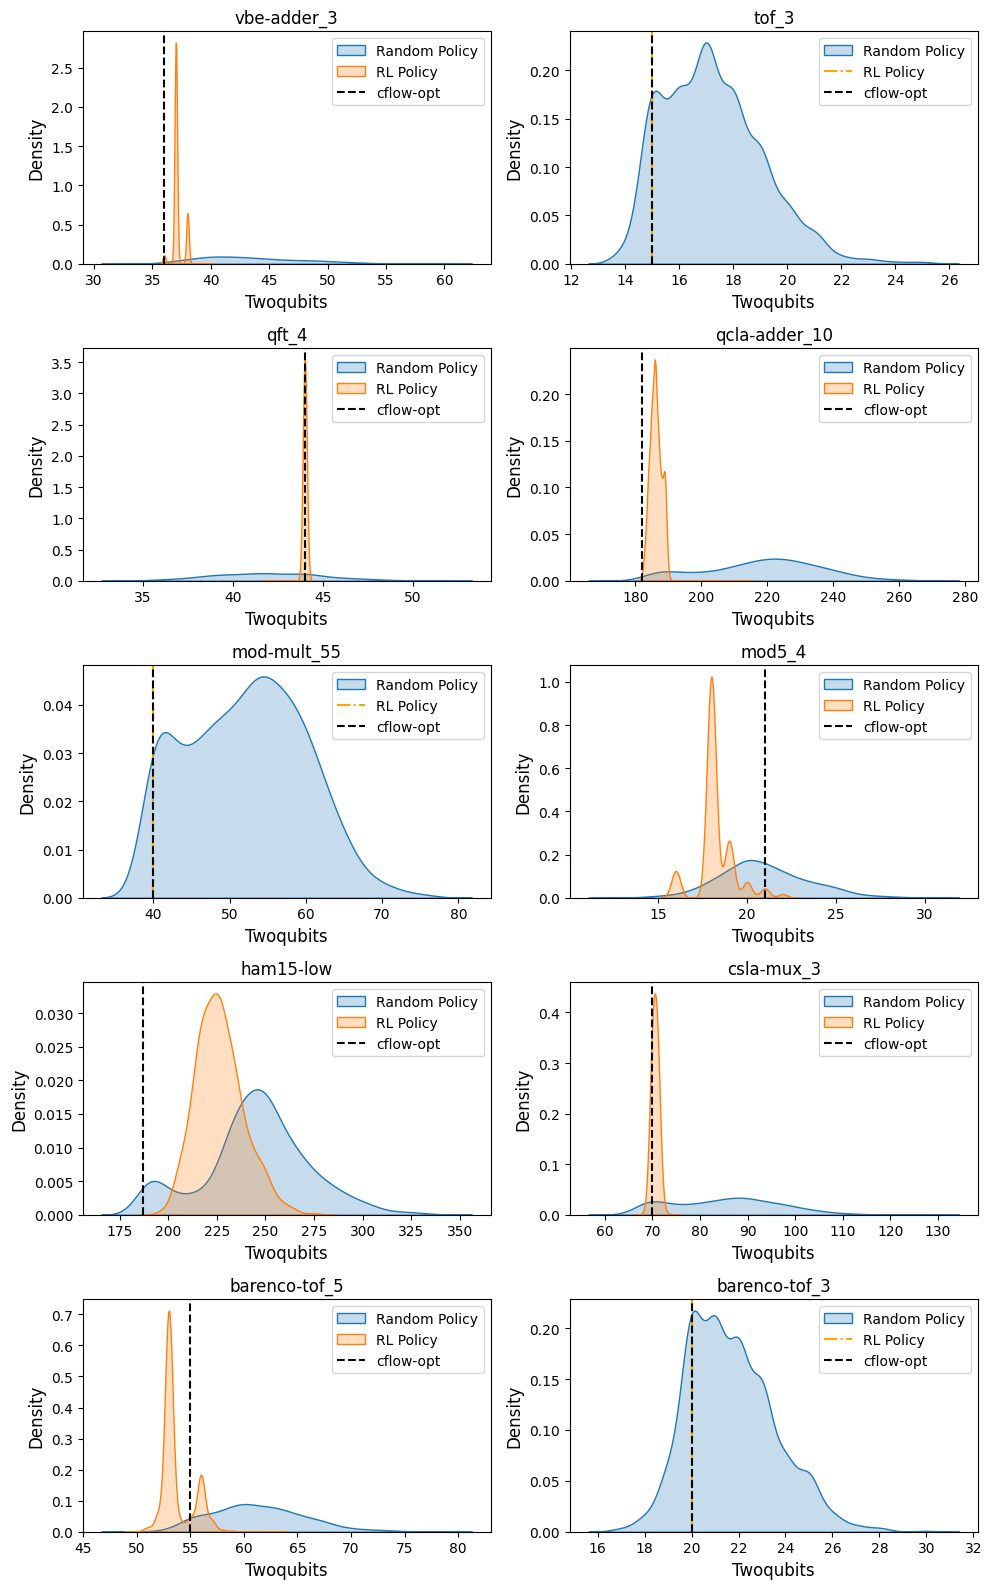

In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Define the folders and full paths
base_path = '/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Circopt-RL-ZXCalc/rl-zx/test-specific-circuits/specific_circuits_data/'
folders = ["random_stats", "rl_stats"]
full_paths = {folder: os.path.join(base_path, folder) for folder in folders}
plt.rcParams['text.usetex'] = True
# Define the circuit names and cflow values
circuits = ["vbe_adder_3", "tof_3", "qft_4", "qcla_adder_10", "mod_mult_55", "mod5_4", "ham15-low", "csla_mux_3_original", "barenco_tof_5", "barenco_tof_3"]
cflow = {"vbe_adder_3": 36 ,"tof_3": 15, "qft_4":44, "qcla_adder_10":182, "mod_mult_55":40, "mod5_4":21, "ham15-low":187, "csla_mux_3_original":70, "barenco_tof_5":55, "barenco_tof_3":20}
circuits_name = {"vbe_adder_3":"vbe-adder_3","tof_3":"tof_3", "qft_4":"qft_4", "qcla_adder_10":"qcla-adder_10", "mod_mult_55": "mod-mult_55", "mod5_4":"mod5_4", "ham15-low":"ham15-low", 
                 "csla_mux_3_original": "csla-mux_3", "barenco_tof_5":"barenco-tof_5", "barenco_tof_3":"barenco-tof_3"}
# Function to read JSON files and extract data
def read_json_file(folder, circuit_name):
    if folder == "random_stats":
        specific_path = "_rand_policy_stats.json"
    else: 
        specific_path = "_rl_stats.json"
    file_path = os.path.join(full_paths[folder], f"{circuit_name}{specific_path}")
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data["twoqubit"]
    return []

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 16))
axes = axes.flatten()

# Plot KDE or line for each circuit
for idx, circuit_name in enumerate(circuits):
    data_random = read_json_file("random_stats", circuit_name)
    data_rl = read_json_file("rl_stats", circuit_name)
    
    if data_random and len(set(data_random)) == 1:
        # Draw a line if all values are the same
        axes[idx].axvline(data_random[0], label='Random Policy', color='blue', linestyle='--')
    elif data_random:
        sns.kdeplot(
            data_random, label='Random Policy', 
            bw_adjust=1 if circuit_name in ['qft_4', 'csla_mux_3_original'] else 1, 
            fill=True, ax=axes[idx]
        )

    if data_rl and len(set(data_rl)) == 1:
        # Draw a line if all values are the same
        axes[idx].axvline(data_rl[0], label='RL Policy ', color='orange', linestyle='-.')
    elif data_rl:
        sns.kdeplot(
            data_rl, label='RL Policy', 
            bw_adjust=5 if circuit_name in ['qft_4', 'csla_mux_3_original'] else 1, 
            fill=True, ax=axes[idx]
        )
    
    # Add a vertical red line for cflow
    if circuit_name in cflow:
        axes[idx].axvline(cflow[circuit_name], label='cflow-opt', color='black', linestyle='--')

    # Customize the subplot
    axes[idx].set_title(circuits_name[circuit_name], fontsize=12)
    axes[idx].set_xlabel('Twoqubits', fontsize=12)
    axes[idx].set_ylabel('Density', fontsize=12)
    axes[idx].legend()

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("kde_plot_latex.png", dpi=300)

# Display the figure
plt.show()


In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Enable LaTeX formatting with standard configuration
plt.rcParams['text.usetex'] = True
# Define the folders and full paths
base_path = '/home/jan.nogue/radagast/home_content_jnogue/qilimanjaro/Circopt-RL-ZXCalc/rl-zx/test-specific-circuits/specific_circuits_data/'
folders = ["random_stats", "rl_stats"]
full_paths = {folder: os.path.join(base_path, folder) for folder in folders}

# Define the circuit names and cflow values
circuits = ["vbe_adder_3", "tof_3", "qft_4", "qcla_adder_10", "mod_mult_55", "mod5_4", "ham15-low", "csla_mux_3_original", "barenco_tof_5", "barenco_tof_3"]
cflow = {"vbe_adder_3": 36 ,"tof_3": 15, "qft_4":44, "qcla_adder_10":182, "mod_mult_55":40, "mod5_4":21, "ham15-low":187, "csla_mux_3_original":70, "barenco_tof_5":55, "barenco_tof_3":20}
circuits_name = {"vbe_adder_3":"vbe-adder_3","tof_3":"tof_3", "qft_4":"qft_4", "qcla_adder_10":"qcla-adder_10", "mod_mult_55": "mod-mult_{55}", "mod5_4":"mod5_4", "ham15-low":"ham15-low", 
                 "csla_mux_3_original": "csla-mux_3", "barenco_tof_5":"barenco-tof_5", "barenco_tof_3":"barenco-tof_3"}
# Function to read JSON files and extract data
def read_json_file(folder, circuit_name):
    if folder == "random_stats":
        specific_path = "_rand_policy_stats.json"
    else: 
        specific_path = "_rl_stats.json"
    file_path = os.path.join(full_paths[folder], f"{circuit_name}{specific_path}")
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data["twoqubit"]
    return []

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 16))
axes = axes.flatten()

# Plot KDE or line for each circuit
for idx, circuit_name in enumerate(circuits):
    data_random = read_json_file("random_stats", circuit_name)
    data_rl = read_json_file("rl_stats", circuit_name)
    
    if data_random and len(set(data_random)) == 1:
        # Draw a line if all values are the same
        axes[idx].axvline(data_random[0], label='Random Policy', color='blue', linestyle='--')
    elif data_random:
        sns.kdeplot(
            data_random, label='Random Policy', 
            bw_adjust=1 if circuit_name in ['qft_4', 'csla_mux_3_original'] else 1, 
            fill=True, ax=axes[idx]
        )

    if data_rl and len(set(data_rl)) == 1:
        # Draw a line if all values are the same
        axes[idx].axvline(data_rl[0], label='RL Policy ', color='orange', linestyle='-.')
    elif data_rl:
        sns.kdeplot(
            data_rl, label='RL Policy', 
            bw_adjust=5 if circuit_name in ['qft_4', 'csla_mux_3_original'] else 1, 
            fill=True, ax=axes[idx]
        )
    
    # Add a vertical red line for cflow
    if circuit_name in cflow:
        axes[idx].axvline(cflow[circuit_name], label='cflow-opt', color='black', linestyle='--')

    # Customize the subplot
    axes[idx].set_title(r'\textbf{time (s)}', fontsize=12)
    axes[idx].set_xlabel(r'Twoqubits', fontsize=12)
    axes[idx].set_ylabel(r'Density', fontsize=12)
    axes[idx].legend()

# Adjust layout
plt.tight_layout()

# Save the figure
#plt.savefig("kde_plot_latex.pdf", dpi=300)

# Display the figure
plt.show()


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpt2n8qtt5 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpt2n8qtt5/844f707e0917555faafa721cd5105dbd.log.




Error in callback <function _draw_all_if_interactive at 0x783f39242cb0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpj0shdmer 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpj0shdmer/844f707e0917555faafa721cd5105dbd.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmps9aaqmvv 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmps9aaqmvv/844f707e0917555faafa721cd5105dbd.log.




<Figure size 1000x1600 with 10 Axes>